In [151]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

scenario_params = {"end_year": 2040, # end year of convergence not for the whole trajectory which is now always 2100
                   "income_goal": 5000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file      
                   "run_until_2100": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_level_2100": 5 #  in gigatons of CO2 per year, so 0.95 means 950 million tons of CO2 per year
            }


scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
scenario_1.run()

#scenario_params2 =  {"end_year": 2080,
                    #"income_goal": 30000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                  #  "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2       
                  #   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on 
                  #  "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                  #  "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                  #  "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   # "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   # "steady_state_high_income_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                    #"k": 0.05,
                   # "t0": 2080,
                   # "final_improvement_rate": -0.05,
                   # "population_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   # "run_until_2100": "on", 
                    #"run_until_2100": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                    #"cdr_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                    #"cdr_level_2100": 10 #  in gigatons of CO2 per year, so 0.95 means 950 million tons of CO2 per year}
 #}


 #scenario_2 = Scenario(scenario_params2)
 #scenario_2.compute_country_scenario_params()
 #print(scenario_2.compute_average_global_growth_rate())
 #scenario_2.run()

-0.016158836201667137


# print a few quantities to check if the model is working

In [152]:
# print a few quantities to check if the model is working


sum_gdp = 0
for country in scenario_1.countries:
    sum_gdp += scenario_1.countries[country].gdp_trajectory[2100]
    print(country, scenario_1.countries[country].gdp_trajectory[2100])

#do the same for the population
sum_pop = 0
for country in scenario_1.countries:
    sum_pop += scenario_1.countries[country].population_trajectory[2100]
    print(country, scenario_1.countries[country].population_trajectory[2100])

# print the total gdp and population
print("Total gdp", sum_gdp)
print("Total population", sum_pop)

Angola 1141393663959.7573
Albania 66322194811.273926
United Arab Emirates 78114007011.8921
Armenia 96986532355.04832
Australia 230463305875.8688
Austria 77821867891.25468
Burundi 276942506957.78674
Belgium 110718329448.89697
Benin 333417504877.9452
Burkina Faso 511857901721.988
Bangladesh 5453711903750.51
Bulgaria 82772866750.24017
Bosnia and Herzegovina 39849347780.993095
Belarus 202303483528.78397
Bolivia 188798298867.1968
Brazil 4220226518102.988
Bhutan 17375449295.1206
Botswana 86501936839.44823
Central African Republic 120814820357.84836
Canada 349117837468.2296
Switzerland 73887079276.63345
Chile 319125387055.2576
China 38254930062125.625
Cote d'Ivoire 771582668783.0206
Cameroon 677055451170.4889
Congo Dem. Rep. 2236205129894.83
Congo Rep. 186664220413.7491
Colombia 1340610429423.4163
Comoros 18662196959.81687
Cabo Verde 14541855173.22347
Costa Rica 93508881570.70663
Cyprus 11935457685.40549
Czech Republic 138330850885.07767
Germany 771715308911.4712
Denmark 53216091108.94713
Dom

### Plot global quantities as a first check

Global GDP per Capita in 2022: $17,444.91
Global GDP per Capita in 2100:   $14,428.34
CAGR from 2022 to 2100:  -0.24%



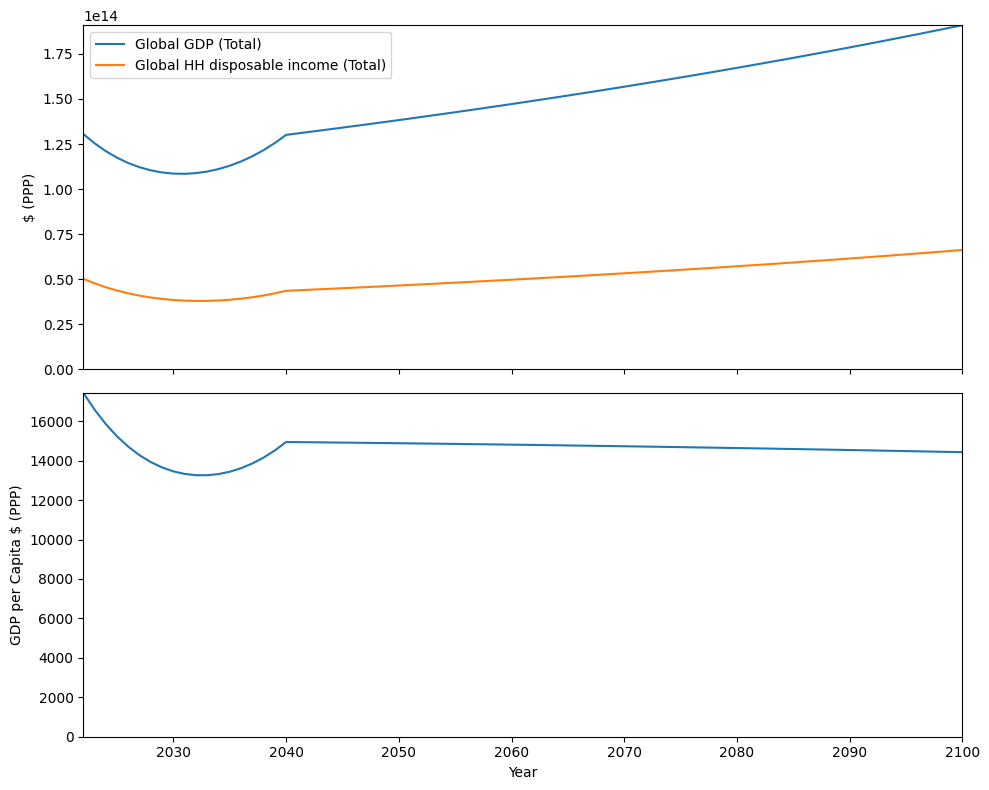

this after calculation emissions 31833357560331.457
this the cdr global level trajectory multiplied 0.0
this after calculation emissions 29948313273402.008
this the cdr global level trajectory multiplied 24657696.68743431
this after calculation emissions 28309053161138.832
this the cdr global level trajectory multiplied 54454014.91963332
this after calculation emissions 26885655253968.133
this the cdr global level trajectory multiplied 90377404.2405529
this after calculation emissions 25260158520183.79
this the cdr global level trajectory multiplied 133568299.50717084
this after calculation emissions 23849177979071.8
this the cdr global level trajectory multiplied 185324809.55166486
this after calculation emissions 22623914011142.67
this the cdr global level trajectory multiplied 247099446.9289212
this after calculation emissions 21559492470873.17
this the cdr global level trajectory multiplied 320482245.47591543
this after calculation emissions 20634369056877.63
this the cdr global le

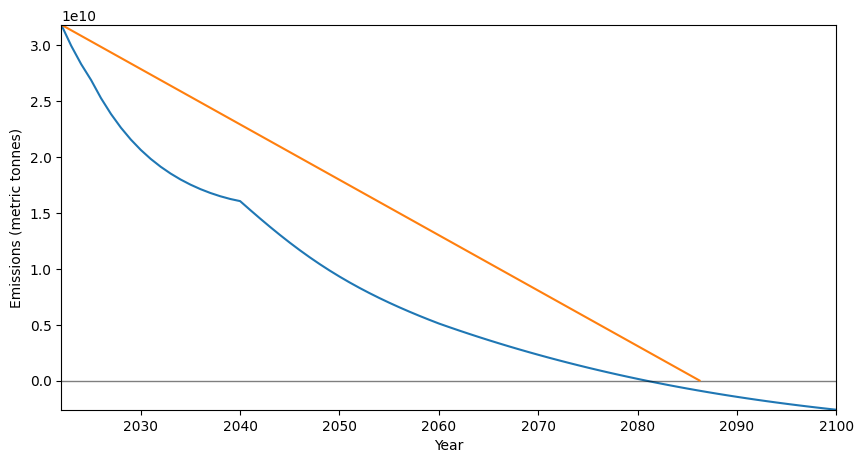

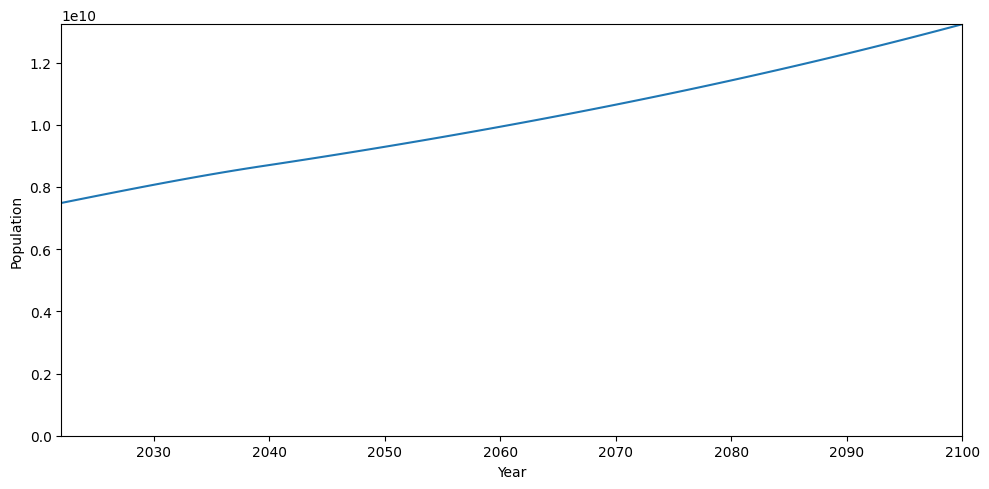

C:\Users\yoswald\AppData\Local\Temp\ipykernel_61932\315272995.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_61932\315272995.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  emission_trajectories[country.code] = country.emissions_trajectory
C:\Users\yoswald\AppData\Local\Temp\ipykernel_61932\315272995.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

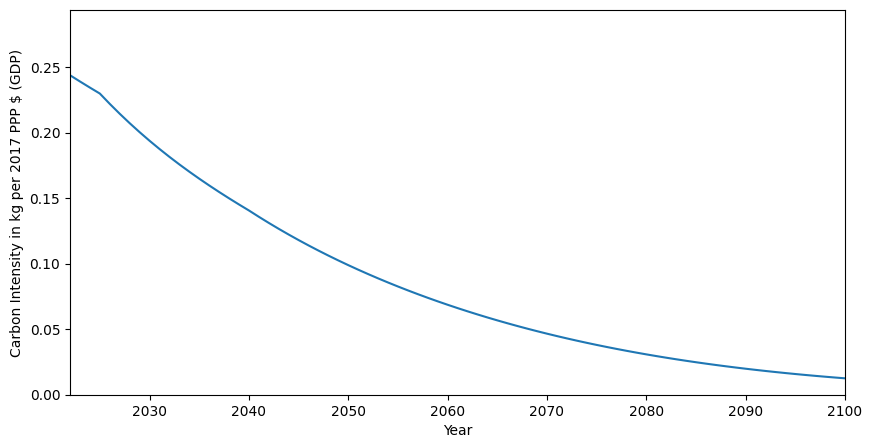

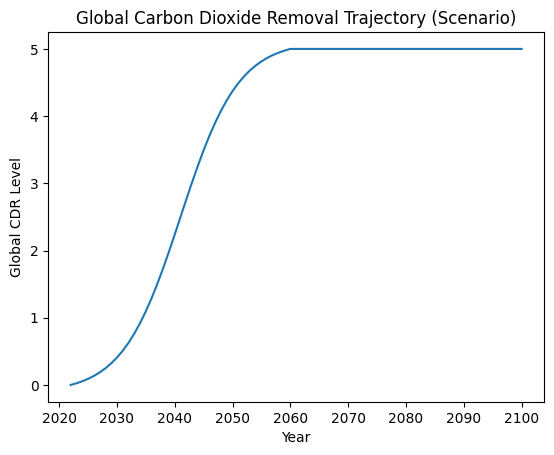

In [153]:


plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()
plotting_1.plot_global_population()
plotting_1.plot_global_carbon_intensity()
if scenario_1.cdr_assumption == "on":

    plotting_1.plot_cdr_global_level_trajectory()


# store all the emission trajectories in a dataframe
emission_trajectories = pd.DataFrame()
for country in scenario_1.countries.values():
    emission_trajectories[country.code] = country.emissions_trajectory

### Compute with steady state



In [154]:
 #plotting_2 = Plots(scenario_2) # the current scenario must be passed to the plotting class to be able to plot the results
 #plotting_2.plot_global_economy()
 #plotting_2.plot_global_emissions()
 #plotting_2.plot_global_population()
 #plotting_2.plot_global_carbon_intensity()

#### Compute global gdp per capita average

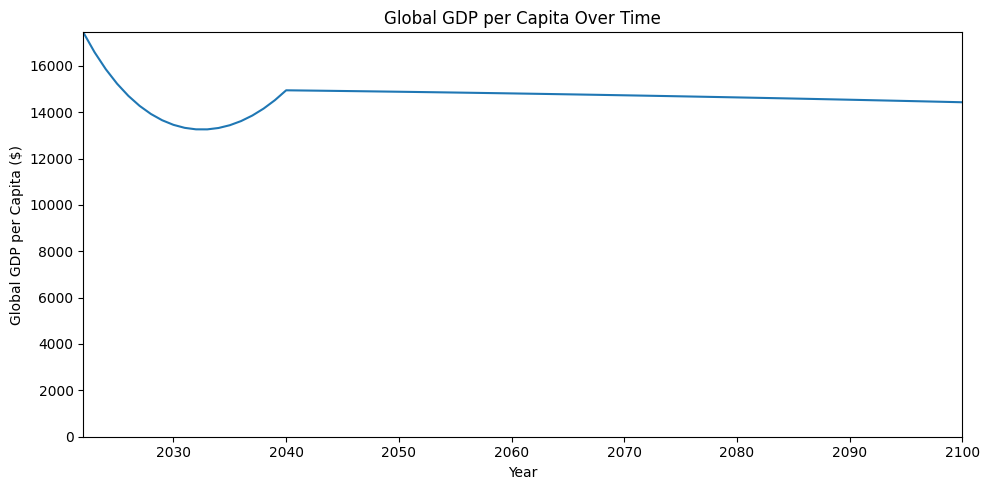

In [155]:
# Compute global gdp per capita average by dividing the global gdp by the global population for 2100 in the gdp trajectory and the pop trajectory
plotting_1.plot_global_gdp_per_capita()

### Plot example country, here the United States

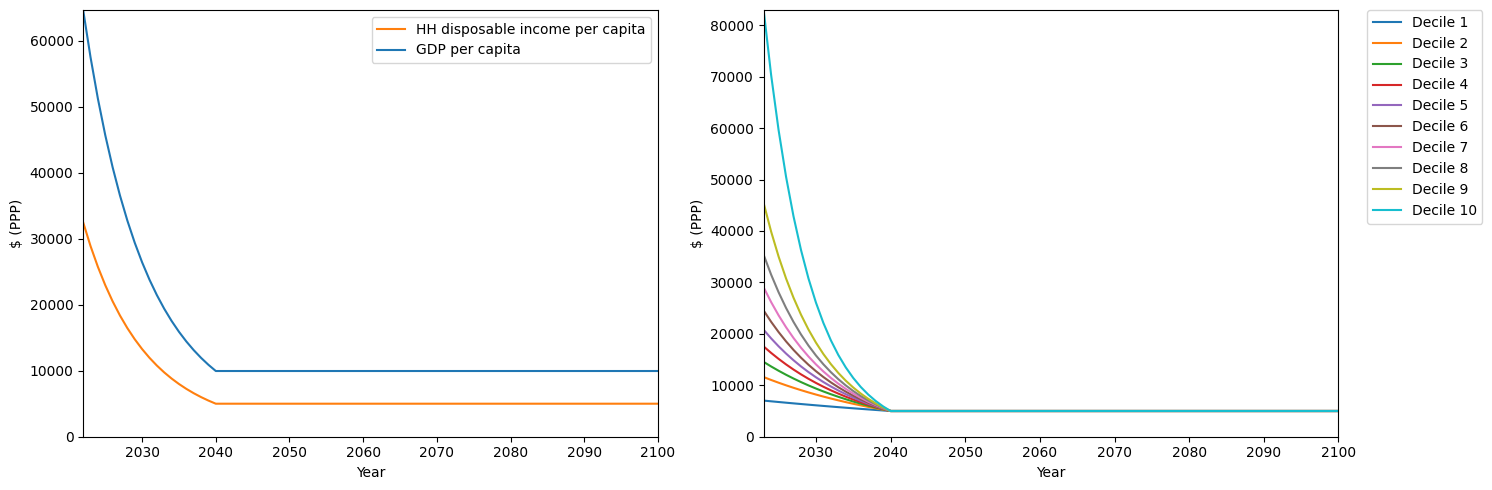

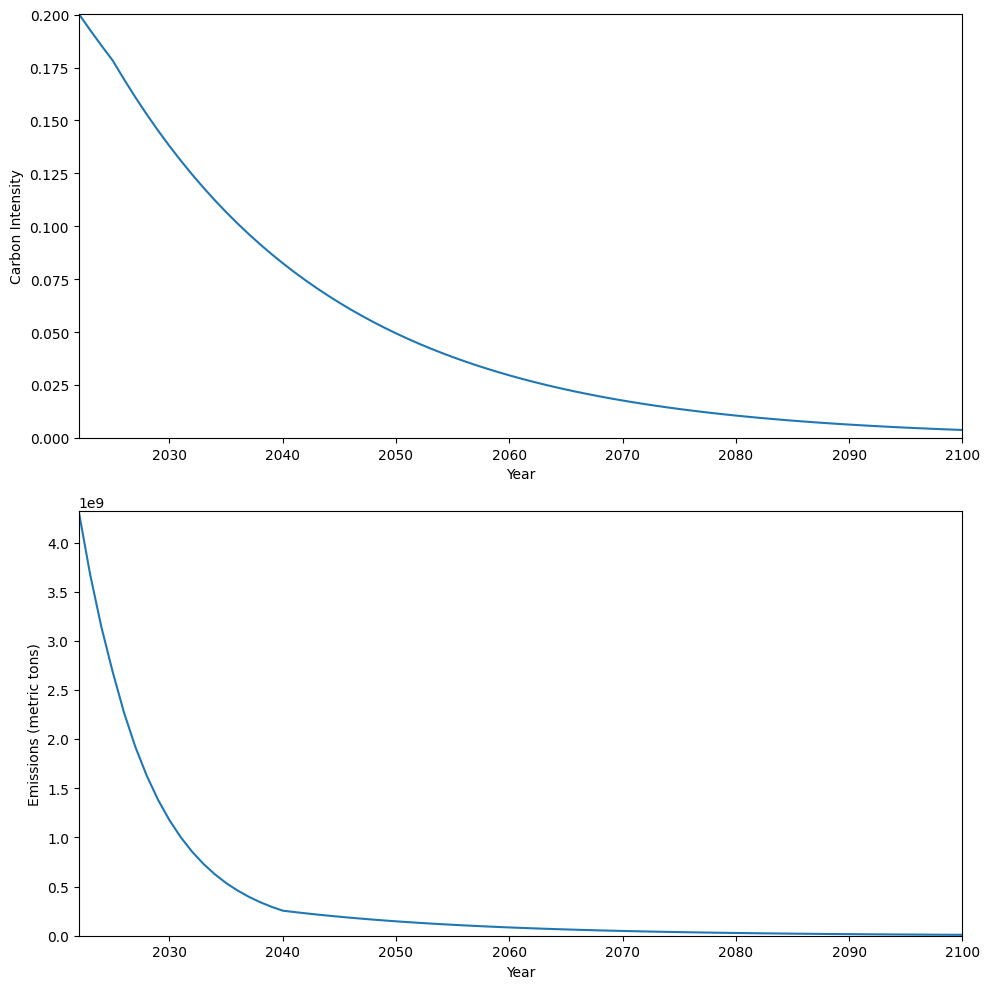

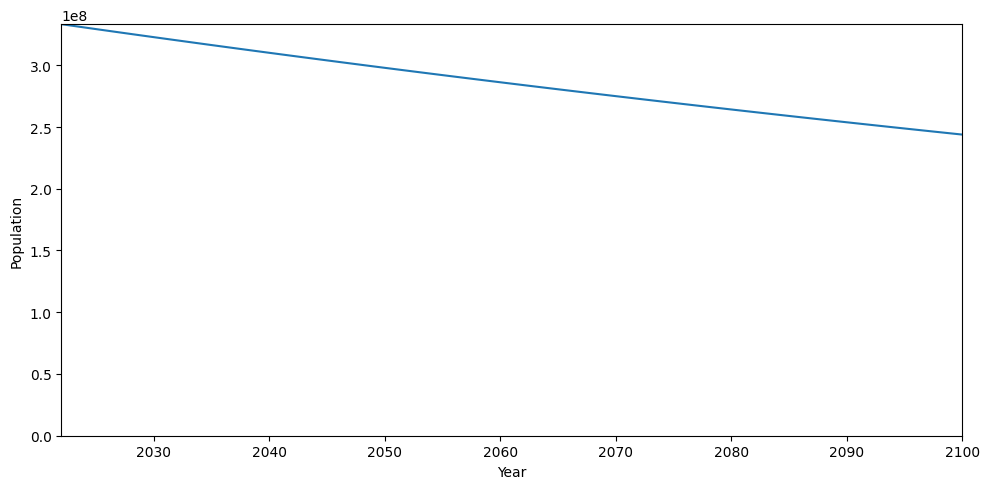

In [156]:
test_country = "United States" # this is the country name as it appears in the scenario_1.countries dictionary
plotting_1.plot_country_economy(test_country)
plotting_1.plot_country_emissions(test_country)
plotting_1.plot_country_population(test_country)


In [157]:
# run a scenario print country specific carbon budgets
#scenario_params = {"end_year": 2060,
             #      "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
              #     "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
              #     "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
              #     "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
              #     "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
              #     "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
              #     "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
              #     "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
              #     "k": 0.05,
              #     "t0": 2060,
              #     "final_improvement_rate": -0.05
            
           # }

#scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
#scenario_1.compute_country_scenario_params()
#print(scenario_1.compute_average_global_growth_rate())
#scenario_1.run()

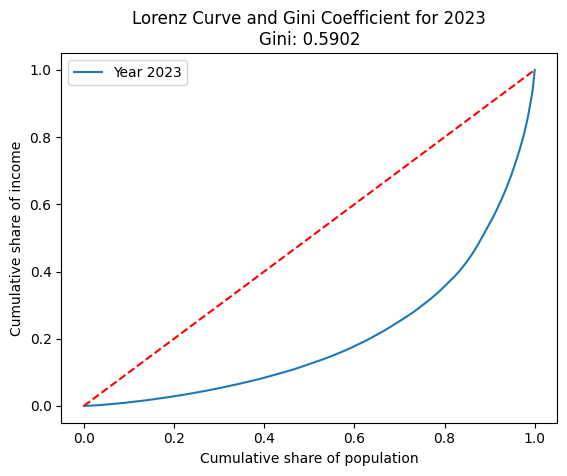

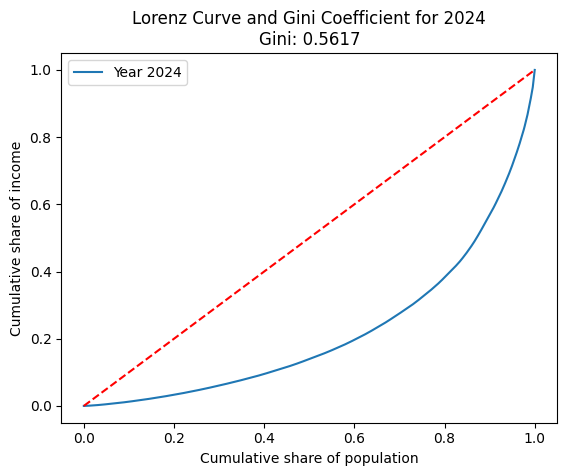

In [158]:
## check whether global population and income vector for gini coefficient and lorenz curve are proper 
# save scenario_1.gini_data dictionary to a csv file
gini_data = pd.DataFrame(scenario_1.gini_data)
gini_data.to_csv(".\gini_data.csv")
# read out the columns population and income from gini data and plot each values as lorenz curve
#subset for every year in gini_data years column the value in population and income column
# loop ovre the years
for year in gini_data["years"]:
    # Get the population data for the year
    population_data = list(gini_data.loc[gini_data["years"] == year, "population"].iloc[0])
    # Get the income data for the year
    income_data = list(gini_data.loc[gini_data["years"] == year, "income"].iloc[0])

    # compute the total income_data as well by multiplying the income_data with the population_data
    total_income = [population_data[i]*income_data[i] for i in range(len(population_data))]

    # compute the cumulative total income share and the cumulative population share
    cumulative_income_share = [sum(total_income[:i])/sum(total_income) for i in range(len(total_income)+1)]

    cumulative_population_share = [sum(population_data[:i])/sum(population_data) for i in range(len(population_data)+1)]

    # Compute the Gini coefficient
    # The area under the Lorenz curve can be computed as the sum of the areas of the trapezoids under it
    area_under_lorenz_curve = sum((cumulative_population_share[i+1] - cumulative_population_share[i]) * 
                                  (cumulative_income_share[i+1] + cumulative_income_share[i]) / 2 
                                  for i in range(len(cumulative_population_share)-1))
    gini_coefficient = 1 - 2 * area_under_lorenz_curve

    # Plot the Lorenz curve
    plt.plot(cumulative_population_share, cumulative_income_share, label=f'Year {year}')
    plt.plot([0, 1], [0, 1], 'r--')  # Line of perfect equality
    plt.xlabel('Cumulative share of population')
    plt.ylabel('Cumulative share of income')
    plt.title(f'Lorenz Curve and Gini Coefficient for {year}\nGini: {gini_coefficient:.4f}')
    plt.legend()
    plt.show()

    if year == 2024:
        break
 

Text(0, 0.5, 'Number of countries')

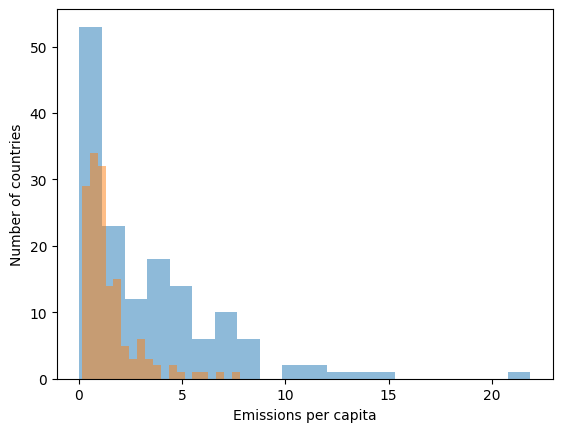

In [159]:
# plot all the emissions per capita in countries at the end of the simulation
beginning_distribution_values =[]
end_distribution_values = []
for country in scenario_1.countries.values():
    beginning_distribution_values.append(country.carbon_emissions_pc_trajectory[2022])
    end_distribution_values.append(country.carbon_emissions_pc_trajectory[scenario_1.end_year])

# plot the beginning and end distribution of emissions per capita
fig, ax = plt.subplots()
ax.hist(beginning_distribution_values, bins=20, alpha=0.5, label='2022')
ax.hist(end_distribution_values, bins=20, alpha=0.5, label='2100')
ax.set_xlabel('Emissions per capita')
ax.set_ylabel('Number of countries')

Text(0, 0.5, 'Emissions per capita in tonnes')

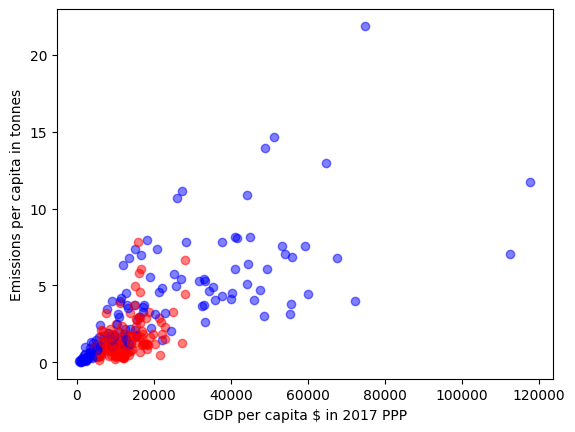

In [160]:
# also plot beginning and end scatter of emissions per capita vs. gdp per capita
fig, ax = plt.subplots()
for country in scenario_1.countries.values():
    ax.scatter(country.gdppc_trajectory[2022], country.carbon_emissions_pc_trajectory[2022], color = 'blue', alpha=0.5)
    ax.scatter(country.gdppc_trajectory[scenario_1.end_year], country.carbon_emissions_pc_trajectory[scenario_1.end_year], color = 'red', alpha=0.5)
    
# name x axis
ax.set_xlabel('GDP per capita $ in 2017 PPP')
# name y axis
ax.set_ylabel('Emissions per capita in tonnes')
# fit a linear fit to the two different data sets directly in the scatter plot
# first do it for the beginning

# Analyze national gini coefficients

In [161]:
print(scenario_1.countries['United States'].decile_trajectories)

{'decile1': {2023: 7025.174603048847, 2024: 6886.041648215827, 2025: 6749.664209112219, 2026: 6615.987712995397, 2027: 6484.9586679310205, 2028: 6356.524641387728, 2029: 6230.63423925575, 2030: 6107.237085281069, 2031: 5986.283800906872, 2032: 5867.725985514248, 2033: 5751.516197054218, 2034: 5637.6079330633365, 2035: 5525.955612055292, 2036: 5416.514555281032, 2037: 5309.240968850134, 2038: 5204.09192620626, 2039: 5101.0253509496815, 2040: 5000.000000000005, 2041: 5000.000000000005, 2042: 5000.000000000005, 2043: 5000.000000000005, 2044: 5000.000000000005, 2045: 5000.000000000005, 2046: 5000.000000000005, 2047: 5000.000000000005, 2048: 5000.000000000005, 2049: 5000.000000000005, 2050: 5000.000000000005, 2051: 5000.000000000005, 2052: 5000.000000000005, 2053: 5000.000000000005, 2054: 5000.000000000005, 2055: 5000.000000000005, 2056: 5000.000000000005, 2057: 5000.000000000005, 2058: 5000.000000000005, 2059: 5000.000000000005, 2060: 5000.000000000005, 2061: 5000.000000000005, 2062: 5000.

In [162]:
# create an empty dataframe in pandas with five columns country, decile, year, scenario, consumption_exp
scenario_full_data = pd.DataFrame(columns=['scenario', 'country', 'decile', 'year', 'consumption_exp'])
scenario_gini_data = pd.DataFrame(columns=['scenario', 'country', 'year', 'gini'])


# make function to add n-element list to dataframe

def add_list_to_dataframe(df, elements):
    # Validate the input
    #print(len(elements))
    #print(len(df.columns))
    if len(elements) != len(df.columns):
        raise ValueError("The number of elements must be exactly equal to the number of columns.")
    
    # Create a DataFrame from the list and append it to the existing DataFrame
    new_df = pd.DataFrame([elements], columns=df.columns)
    df = pd.concat([df, new_df], ignore_index=True)
    
    return df

In [163]:
# loop over the countries and add each country with the concat() method to the dataframe
i = 0
scenario_id = str(scenario_1.income_goal) + '_' + str(scenario_1.end_year)
for country in scenario_1.countries.values():
    i += 1
    for decile, years in country.decile_trajectories.items():
        for year, value in years.items():
            countryvalues = [] # create empty list for current country values
            countryvalues.append(scenario_id) # add scenario_id to the list
            countryvalues.append(country.code) # add country code to the list
            countryvalues.append(decile)
            #print(year)
            countryvalues.append(year)
            #print(value)
            countryvalues.append(value)
            scenario_full_data = add_list_to_dataframe(scenario_full_data, countryvalues)
    if i == 2:
         break





C:\Users\yoswald\AppData\Local\Temp\ipykernel_61932\3909973554.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


In [164]:
# loop over the countries and add each country with the concat() method to the dataframe
i = 0
scenario_id = str(scenario_1.income_goal) + '_' + str(scenario_1.end_year)
for country in scenario_1.countries.values():
    i += 1
    for value, years in country.gini_coefficient_trajectory.items():
            countryvalues2 = [] # create empty list for current country values
            countryvalues2.append(scenario_id) # add scenario_id to the list
            countryvalues2.append(country.code) # add country code to the list
            countryvalues2.append(years)
            countryvalues2.append(value)   
            scenario_gini_data = add_list_to_dataframe(scenario_gini_data, countryvalues2)
    if i == 2:
         break


C:\Users\yoswald\AppData\Local\Temp\ipykernel_61932\3909973554.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


0.019024561105832172


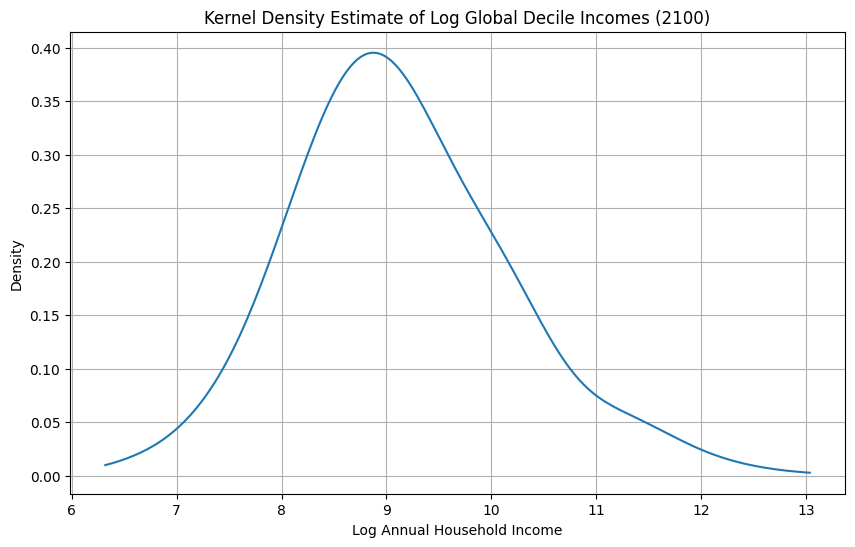

In [165]:


scenario_params = {"end_year": 2080, # end year of convergence not for the whole trajectory which is now always 2100
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1150*0.95 - 2*35, # in terms of GtCO2 that is gigatons of CO2   and times 95% because 95% population coverage     
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on_with_growth", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
                   "k": 0.05,
                   "t0": 2060,
                   "final_improvement_rate": -0.05,
                   "population_hysteresis_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file      
                   "run_until_2100": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
                   "cdr_level_2100": 10 #  in gigatons of CO2 per year, so 0.95 means 950 million tons of CO2 per year
            }


scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
#scenario_1.run()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Ensure you have a Scenario instance that's been run through to 2100:
# scenario = Scenario(scenario_params)
scenario_1.run()

# Retrieve the decile income distribution data
incomes, weights = scenario_1.get_decile_income_distribution_data()

# Transform to log incomes
log_incomes = np.log(incomes)

# Perform weighted kernel density estimation on log incomes
kde = gaussian_kde(log_incomes, weights=weights)
xgrid = np.linspace(log_incomes.min(), log_incomes.max(), 200)
density = kde(xgrid)

# Plot the KDE of log incomes
plt.figure(figsize=(10, 6))
plt.plot(xgrid, density)
plt.xlabel("Log Annual Household Income")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Log Global Decile Incomes (2100)")
plt.grid(True)
plt.show()
plt.show()

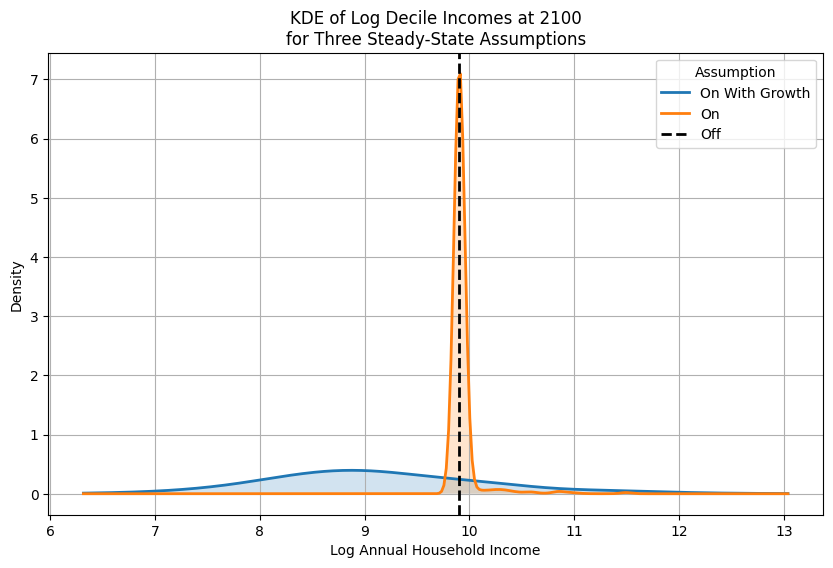

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scenario_class import Scenario

# Base scenario parameters (common to all three)
base_params = {
    "end_year": 2080,
    "income_goal": 20000,
    "carbon_budget": 1150*0.95 - 2*35,
    "hysteresis_tech_progress": 0.01,
    "gdp_assumption": "constant_ratio",
    "pop_growth_assumption": "semi_log_model",
    "tech_evolution_assumption": "plausible",
    "tech_hysteresis_assumption": "on",
    "k": 0.05,
    "t0": 2060,
    "final_improvement_rate": -0.05,
    "population_hysteresis_assumption": "on",
    "run_until_2100": "on",
    "cdr_assumption": "on",
    "cdr_level_2100": 10
}

assumptions = ["on_with_growth", "on", "off"]

# Collect log-incomes and weights for each assumption
data_by_assumption = {}
for assumption in assumptions:
    params = base_params.copy()
    params["steady_state_high_income_assumption"] = assumption
    scenario = Scenario(params)
    scenario.compute_country_scenario_params()
    scenario.run()
    incomes, weights = scenario.get_decile_income_distribution_data()
    log_incomes = np.log(incomes)
    data_by_assumption[assumption] = (log_incomes, weights)

# Common x-grid
all_logs = np.concatenate([vals[0] for vals in data_by_assumption.values()])
xgrid = np.linspace(all_logs.min(), all_logs.max(), 300)

# Precompute densities for non-constant cases
densities = {}
for assumption, (logs, w) in data_by_assumption.items():
    # Check if all values are equal (constant distribution)
    if not np.allclose(logs, logs[0]):
        kde = gaussian_kde(logs, weights=w)
        densities[assumption] = kde(xgrid)

# Determine max density for filling the "off" vertical line
max_density = max(d.max() for d in densities.values())

# Plot
plt.figure(figsize=(10, 6))

# Plot KDEs for 'on_with_growth' and 'on'
for assumption in ["on_with_growth", "on"]:
    density = densities[assumption]
    label = assumption.replace("_", " ").title()
    plt.plot(xgrid, density, label=label, linewidth=2)
    plt.fill_between(xgrid, density, alpha=0.2)

# Plot vertical line for 'off'
logs_off, _ = data_by_assumption["off"]
x0 = logs_off[0]
plt.axvline(x0, color='k', linestyle='--', linewidth=2, label="Off")
plt.fill_betweenx([0, max_density], x0, x0, alpha=0.2)

plt.xlabel("Log Annual Household Income")
plt.ylabel("Density")
plt.title("KDE of Log Decile Incomes at 2100\nfor Three Steady-State Assumptions")
plt.legend(title="Assumption")
plt.grid(True)
plt.show()


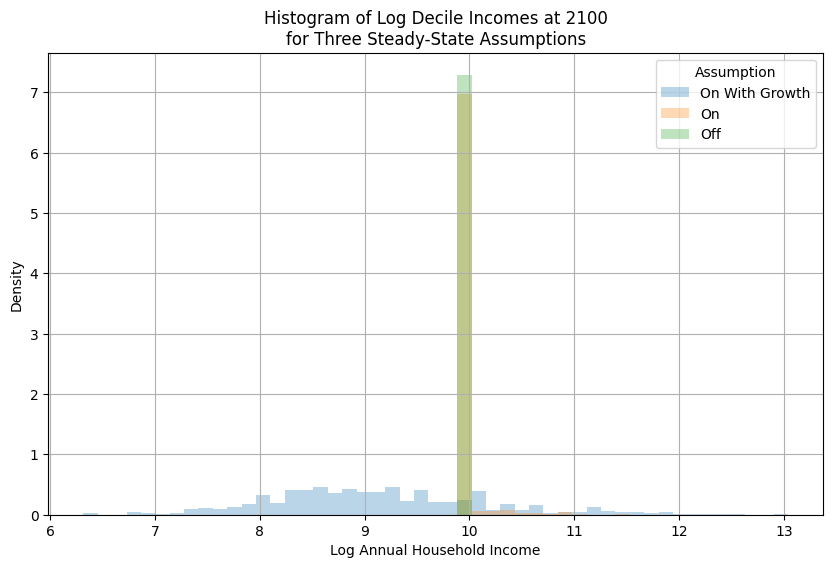

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scenario_class import Scenario

# Base scenario parameters (common to all three)
base_params = {
    "end_year": 2080,
    "income_goal": 20000,
    "carbon_budget": 1150*0.95 - 2*35,
    "hysteresis_tech_progress": 0.01,
    "gdp_assumption": "constant_ratio",
    "pop_growth_assumption": "semi_log_model",
    "tech_evolution_assumption": "plausible",
    "tech_hysteresis_assumption": "on",
    "k": 0.05,
    "t0": 2060,
    "final_improvement_rate": -0.05,
    "population_hysteresis_assumption": "on",
    "run_until_2100": "on",
    "cdr_assumption": "on",
    "cdr_level_2100": 10
}

assumptions = ["on_with_growth", "on", "off"]
hist_data = {}

# Run each scenario and collect log‐incomes + weights
for assumption in assumptions:
    params = base_params.copy()
    params["steady_state_high_income_assumption"] = assumption

    scenario = Scenario(params)
    scenario.compute_country_scenario_params()
    scenario.run()

    incomes, weights = scenario.get_decile_income_distribution_data()
    hist_data[assumption] = (np.log(incomes), weights)

# Choose common bins over the full range
all_logs = np.concatenate([logs for logs, w in hist_data.values()])
bins = np.linspace(all_logs.min(), all_logs.max(), 50)

# Plot
plt.figure(figsize=(10, 6))
for assumption, (logs, w) in hist_data.items():
    label = assumption.replace("_", " ").title()
    # for the "off" case (all identical), this will collapse to a single-bin spike
    plt.hist(
        logs,
        bins=bins,
        weights=w,
        density=True,
        histtype='stepfilled',
        alpha=0.3,
        label=label
    )

plt.xlabel("Log Annual Household Income")
plt.ylabel("Density")
plt.title("Histogram of Log Decile Incomes at 2100\nfor Three Steady-State Assumptions")
plt.legend(title="Assumption")
plt.grid(True)
plt.show()


In [168]:
# For all countries, check that gdp_trajectory[year] == gdppc_trajectory[year] * population_trajectory[year] for all years, starting from 2023
for country in scenario_1.countries.values():
    years = [year for year in country.gdppc_trajectory.keys() if year >= 2023]
    for year in years:
        gdp = country.gdp_trajectory[year]
        gdppc = country.gdppc_trajectory[year]
        pop = country.population_trajectory[year]
        computed_gdp = gdppc * pop
        if not np.isclose(gdp, computed_gdp, rtol=1e-6):
            print(f"Mismatch in {country.code} for year {year}: gdp={gdp}, gdppc*pop={computed_gdp}")
        else:
            print(f"{country.code} {year}: seems correct")

AGO 2023: seems correct
AGO 2024: seems correct
AGO 2025: seems correct
AGO 2026: seems correct
AGO 2027: seems correct
AGO 2028: seems correct
AGO 2029: seems correct
AGO 2030: seems correct
AGO 2031: seems correct
AGO 2032: seems correct
AGO 2033: seems correct
AGO 2034: seems correct
AGO 2035: seems correct
AGO 2036: seems correct
AGO 2037: seems correct
AGO 2038: seems correct
AGO 2039: seems correct
AGO 2040: seems correct
AGO 2041: seems correct
AGO 2042: seems correct
AGO 2043: seems correct
AGO 2044: seems correct
AGO 2045: seems correct
AGO 2046: seems correct
AGO 2047: seems correct
AGO 2048: seems correct
AGO 2049: seems correct
AGO 2050: seems correct
AGO 2051: seems correct
AGO 2052: seems correct
AGO 2053: seems correct
AGO 2054: seems correct
AGO 2055: seems correct
AGO 2056: seems correct
AGO 2057: seems correct
AGO 2058: seems correct
AGO 2059: seems correct
AGO 2060: seems correct
AGO 2061: seems correct
AGO 2062: seems correct
AGO 2063: seems correct
AGO 2064: seems 